In [20]:
import pandas as pd
import matplotlib.pyplot as plt

#폰트 오류 수정
from matplotlib import font_manager,rc
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.style.use('ggplot')

df20 = pd.read_excel('대학주요정보2020.xlsx',header=0)
df20.head() #파일이 무사히 열렸음을 확인할 수 있음!

C:\Users\jumin\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,No,공시년도,학교명,본분교명,학교종류,학교유형,설립유형,지역명,"입학정원(학부)\n(2020,명)","졸업생수(학부)\n(2020,명)","전임교원수(학부+대학원)\n(2020,명)","재학생(학부)\n(2020,명)","신입생 경쟁률(학부)\n(2020,:1)","취업률(학부)\n(2020,%)"
0,1,2020,ICT폴리텍대학,본교,전문대학,기능대학,사립,경기,160,130,16,307,4.5,66.4
1,2,2020,가야대학교(고령),제2캠퍼스,대학,대학교,사립,경북,0,0,0,0,0.0,0.0
2,3,2020,가야대학교(김해),본교,대학,대학교,사립,경남,568,630,97,2176,5.4,77.0
3,4,2020,가천대학교,본교,대학,대학교,사립,경기,3766,4322,905,18678,15.9,67.2
4,5,2020,가톨릭관동대학교,본교,대학,대학교,사립,강원,2080,1721,423,8107,4.9,56.3


In [21]:
df21 = pd.read_excel('대학주요정보2021.xlsx',header=0)
df21.head() #파일이 무사히 열렸음을 확인할 수 있음!

C:\Users\jumin\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,No,공시년도,학교명,본분교명,학교종류,학교유형,설립유형,지역명,"입학정원(학부)\n(2021,명)","졸업생수(학부)\n(2021,명)","전임교원수(학부+대학원)\n(2021,명)","재학생(학부)\n(2021,명)","신입생 경쟁률(학부)\n(2021,:1)","취업률(학부)\n(2021,%)"
0,1,2021,ICT폴리텍대학,본교,전문대학,기능대학,사립,경기,160,131,16,261,2.5,65.5
1,2,2021,가야대학교(고령),제2캠퍼스,대학,대학교,사립,경북,0,0,0,0,0.0,0.0
2,3,2021,가야대학교(김해),본교,대학,대학교,사립,경남,518,546,89,2022,5.2,71.4
3,4,2021,가천대학교,본교,대학,대학교,사립,경기,3866,4178,915,19308,15.5,64.3
4,5,2021,가톨릭관동대학교,본교,대학,대학교,사립,강원,2045,1673,427,7458,4.2,56.6


In [22]:
# 경쟁률과 취업률만 추출하여 정리
df_20 = df20[['No','학교명','학교종류','지역명','신입생 경쟁률(학부)\n(2020,:1)','취업률(학부)\n(2020,%)']]
df_20.head()

,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2020,:1)","취업률(학부)\n(2020,%)"
0,1,ICT폴리텍대학,전문대학,경기,4.5,66.4
1,2,가야대학교(고령),대학,경북,0.0,0.0
2,3,가야대학교(김해),대학,경남,5.4,77.0
3,4,가천대학교,대학,경기,15.9,67.2
4,5,가톨릭관동대학교,대학,강원,4.9,56.3


In [23]:
# 경쟁률과 취업률만 추출하여 정리
df_21 = df21[['No','학교명','학교종류','지역명','신입생 경쟁률(학부)\n(2021,:1)','취업률(학부)\n(2021,%)']]
df_21.head()

,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2021,:1)","취업률(학부)\n(2021,%)"
0,1,ICT폴리텍대학,전문대학,경기,2.5,65.5
1,2,가야대학교(고령),대학,경북,0.0,0.0
2,3,가야대학교(김해),대학,경남,5.2,71.4
3,4,가천대학교,대학,경기,15.5,64.3
4,5,가톨릭관동대학교,대학,강원,4.2,56.6


In [24]:
df_20 = df_20[df_20['신입생 경쟁률(학부)\n(2020,:1)'] != 0] # 결측값 삭제
df_20 = df_20[df_20['학교종류'] != '전문대학'] #전문대 제거 
df_20_top30 = df_20.sort_values(by='취업률(학부)\n(2020,%)',ascending = False) # 취업률 높은순 정렬
df_20_top30 =df_20_top30.head(n=30) # 그중 top30 만 남김

df_20_top30 = df_20_top30.reset_index(drop=True) #인덱스가 섞이므로 초기화 
df_20_top30


,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2020,:1)","취업률(학부)\n(2020,%)"
0,283,을지대학교,대학,대전,17.4,90.3
1,151,목포가톨릭대학교,대학,전남,3.7,89.4
2,8,가톨릭대학교,대학,서울,30.1,88.2
3,343,칼빈대학교,대학,경기,3.0,87.8
4,36,경동대학교,대학,강원,7.5,87.6
5,356,한국기술교육대학교,대학,충남,7.3,84.7
6,154,목포해양대학교,대학,전남,4.1,82.0
7,25,건양대학교,대학,대전,9.2,80.9
8,253,영남신학대학교,대학,경북,2.0,78.9
9,39,경동대학교,대학,경기,6.4,78.8


In [25]:
df_21 = df_21[df_21['신입생 경쟁률(학부)\n(2021,:1)'] != 0] # 결측값 삭제
df_21 = df_21[df_21['학교종류'] != '전문대학'] #전문대 제거 
df_21_top30 = df_21.sort_values(by='취업률(학부)\n(2021,%)',ascending = False) # 취업률 높은순 정렬
df_21_top30 = df_21_top30.head(n=30) # 그중 top30 만 남김

df_21_top30 = df_21_top30.reset_index(drop=True) #인덱스가 섞이므로 초기화 
df_21_top30

,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2021,:1)","취업률(학부)\n(2021,%)"
0,8,가톨릭대학교,대학,서울,36.3,90.5
1,153,목포해양대학교,대학,전남,3.8,84.2
2,26,건양대학교,대학,대전,7.7,83.5
3,281,을지대학교,대학,대전,27.0,83.0
4,38,경동대학교,대학,강원,5.8,81.8
5,342,칼빈대학교,대학,경기,2.4,80.4
6,150,목포가톨릭대학교,대학,전남,4.5,79.2
7,259,예수대학교,대학,전북,5.8,78.0
8,37,경동대학교,대학,경기,6.2,77.9
9,6,가톨릭꽃동네대학교,대학,충북,4.5,76.5


ConversionError: Failed to convert value(s) to axis units: array(['가톨릭대학교', '목포해양대학교', '건양대학교', '을지대학교', '경동대학교', '칼빈대학교',
       '목포가톨릭대학교', '예수대학교', '경동대학교', '가톨릭꽃동네대학교', '을지대학교', '성균관대학교',
       '한국기술교육대학교', '포항공과대학교', '대구교육대학교', '한국성서대학교', '한려대학교', '호원대학교',
       '서강대학교', '한양대학교', '초당대학교', '고려대학교', '가야대학교(김해)', '창신대학교', '중앙대학교',
       '서울대학교', '부산가톨릭대학교', '부산교육대학교', '연세대학교', '경동대학교'], dtype=object)

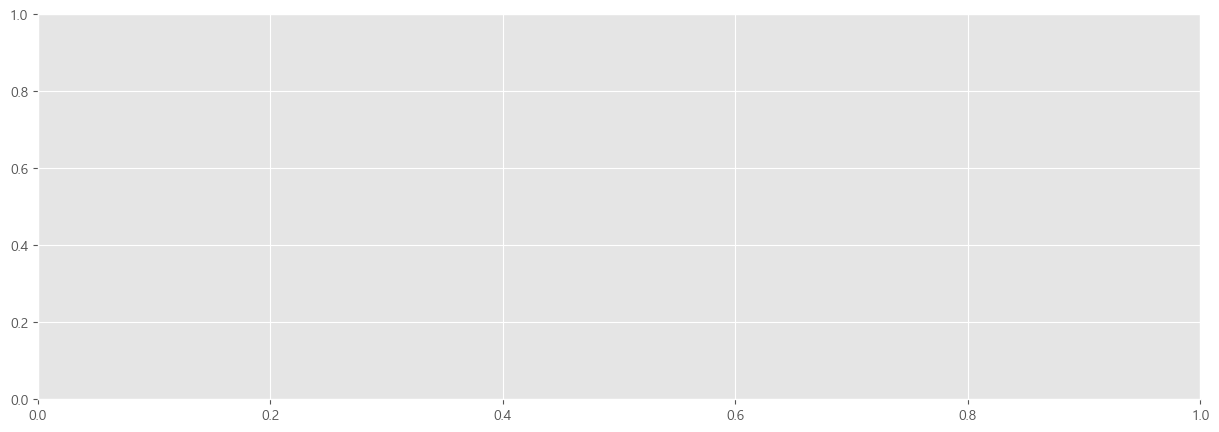

In [26]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

df_21_comp = df_21_top30['신입생 경쟁률(학부)\n(2021,:1)']
df_20_comp = df_20_top30['신입생 경쟁률(학부)\n(2020,:1)']

ax.plot(df_21_comp.index, df_21_top30.values,label='2021 대입 경쟁률')
ax.plot(df_20_comp.index, df_20_top30.values,label='2020 대입 경쟁률')

#범례 추가
ax.legend(loc='best')

#챠트 제목
ax.set_title('2020-2021 경쟁률 비교')

#축 이름 추가
ax.set_xlabel('취업률 상위 30개')
ax.set_ylabel('입시 경쟁률')

plt.show()

In [19]:
df22 = pd.read_excel('대학주요정보2022.xlsx',header=0)
df22.head() #파일이 무사히 열렸음을 확인할 수 있음!
df_22 = df22[['No','학교명','학교종류','지역명','신입생 경쟁률(학부)\n(2022,:1)','취업률(학부)\n(2021,%)']]

df_22 = df_22[df_22['신입생 경쟁률(학부)\n(2022,:1)'] != 0] # 결측값 삭제
df_22 = df_22[df_22['학교종류'] != '전문대학'] #전문대 제거 
df_22_top100 = df_22.sort_values(by='취업률(학부)\n(2021,%)',ascending = False) # 취업률 높은순 정렬
df_22_top100 =df_22_top100.head(n=100) # 그중 top30 만 남김

df_22_top100 = df_22_top100.reset_index(drop=True) #인덱스가 섞이므로 초기화 

C:\Users\jumin\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
df_22_seoul = df_22_top100[df_22_top100['지역명'] == '서울']
df_22_seoul = df_22_seoul.reset_index(drop=True) #인덱스가 섞이므로 초기화 
df_22_seoul

df_22_gg = df_22_top100[df_22_top100['지역명'] == '경기']
df_22_gg = df_22_gg.reset_index(drop=True) #인덱스가 섞이므로 초기화 

df_22_inc = df_22_top100[df_22_top100['지역명'] == '인천']
df_22_inc = df_22_inc.reset_index(drop=True) #인덱스가 섞이므로 초기화 

df_22_jeju = df_22_top100[df_22_top100['지역명'] == '제주']
df_22_jeju = df_22_jeju.reset_index(drop=True) #인덱스가 섞이므로 초기화 


df_22_seoul


,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2022,:1)","취업률(학부)\n(2021,%)"
0,8,가톨릭대학교,대학,서울,45.5,90.5
1,201,성균관대학교,대학,서울,16.7,76.0
2,355,한국성서대학교,대학,서울,7.0,74.0
3,177,서강대학교,대학,서울,20.1,73.8
4,410,한양대학교,대학,서울,18.9,73.5
5,62,고려대학교,대학,서울,10.8,71.6
6,312,중앙대학교,대학,서울,23.4,71.3
7,184,서울대학교,대학,서울,5.6,71.1
8,243,연세대학교,대학,서울,10.7,70.0
9,363,한국체육대학교,대학,서울,5.7,68.4


In [12]:
df_22_gg

,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2022,:1)","취업률(학부)\n(2021,%)"
0,337,칼빈대학교,대학,경기,1.9,80.4
1,38,경동대학교,대학,경기,7.6,77.9
2,278,을지대학교,대학,경기,11.6,76.3
3,234,아주대학교,대학,경기,17.5,68.3
4,230,신한대학교,대학,경기,11.4,68.1
5,317,차의과학대학교,대학,경기,7.8,67.2
6,343,한국공학대학교,대학,경기,7.2,66.8
7,408,한세대학교,대학,경기,10.6,66.8
8,144,명지대학교,대학,경기,10.4,65.0
9,4,가천대학교,대학,경기,15.4,64.3


In [13]:
df_22_inc

,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2022,:1)","취업률(학부)\n(2021,%)"
0,284,인천가톨릭대학교,대학,인천,6.8,66.9
1,289,인하대학교,대학,인천,13.7,66.0


In [14]:
df_22_jeju

,No,학교명,학교종류,지역명,"신입생 경쟁률(학부)\n(2022,:1)","취업률(학부)\n(2021,%)"
0,304,제주국제대학교,대학,제주,0.5,68.3
